## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions. <br>
**1. What is the difference between regression and classification?** <br>
Regression is a way e can predict a number on a continuous outcome basis like temperature or weight. On the other hand, classification helps us predict a category or a label so something that is more qualitative. 

**2. What is a confusion table/matrix? What does it help us understand about a model's performance?** <br>
A confusion matrix is a table comparing true labels and predicted labels. It shows the total number of correct and incorrect predictions. And helps us identify what types of mistakes the model makes. 

**3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?** <br>
Accuracy is the proportion of predictions that are correct. It is not always sufficient to evaluate a classifier's predictive performance because it can looked skewed depending on how imbalanced the classes are and it doesn't tell you what kinds of errors you are making which is why we cannot fully rely on it. 

**4. What does the root mean squared error quantify about a particular model?** <br>
Root Mean Squared Error measures the typical size of a model's prediction errors in regression. It basically measures how far predictions are from the true values. It penalizes large errors more because errors are squared before averaging. 

**5. What are overfitting and underfitting?**  <br>
Overfitting the model means that the model learns the specifics of the training data and it is usually way too complex. On the other hand, underfitting the model means that the model is way too simple to capture the true pattern in the both the trained data and the data set it is being used on. 
   
**6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?**  <br>
Splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improves model performance because the training set is for fitting the model, the test set simulates new data to estimate generalization. Finally, choosing k based on test accuracy/RMSE helps avoid picking a k that only looks good on training data and instead selects a k that performs better on new data.

**7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.**
<br>

**Class Label:**
Strengths: simple, easy to interpret and act on 
Weaknesses: hides uncertainty, less flexible for different cost settings 

**Probability Distribution:**
Strengths: shows confidence/ uncertainty, lets you choose thresholds, useful for ranking and risk decisions
Weaknesses: probabilities can be miscalibrated and you still must choose a threshold if you ultimately need a single label


**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

(338, 4)
mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


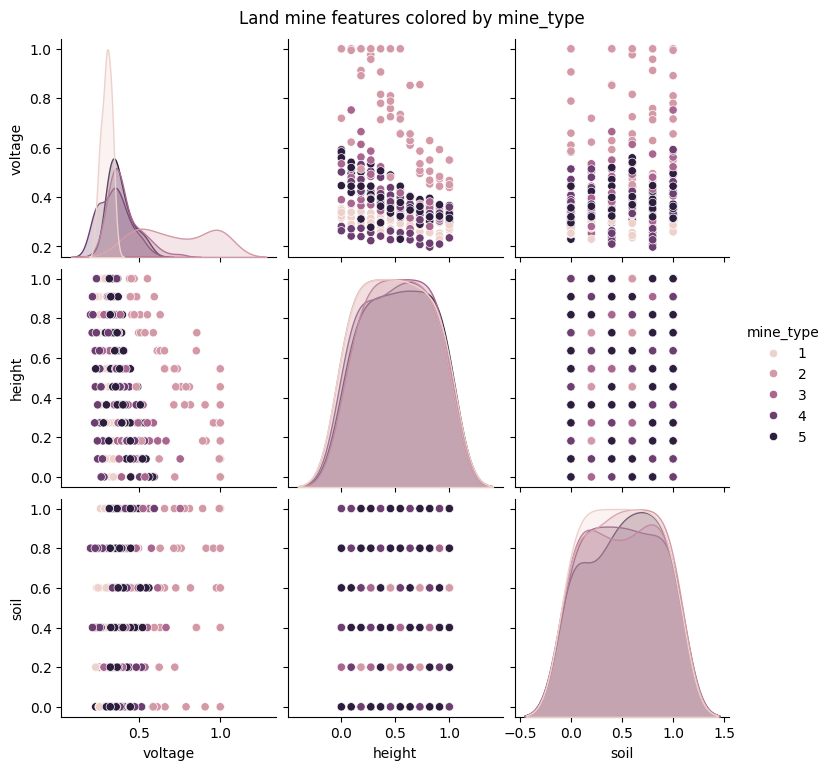

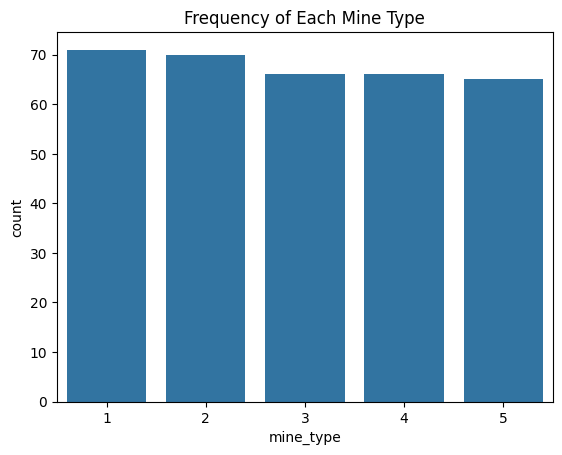

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/land_mines.csv', encoding = 'latin1')
df.head()

print(df.shape)
print(df["mine_type"].value_counts())
print(df.describe())
sns.pairplot(df, hue="mine_type", vars=["voltage", "height", "soil"], diag_kind="kde")
plt.suptitle("Land mine features colored by mine_type", y=1.02)
plt.show()
sns.countplot(data=df, x="mine_type")
plt.title("Frequency of Each Mine Type")
plt.show()

**Answer to question 1:** There are 338 rows, 4 columns. Mine type has 5 classes and is fairly balanced with around 65 - 70 counts each. One graph that I found interesting was the height x voltage graph. It appears that voltage generally decreases as height increases. The points show up in horizontal bands because voltage takes only a few repeated values. Mine types overlap heavily in this plot, so it’s not an easy one-feature separation.

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define the target variable and control variables
y = df['mine_type'] 
ctrl_list = ["voltage", "height", "soil"]  
x = df.loc[:, ctrl_list]
# Normalize the control variables using MinMaxScaler 
scaler = MinMaxScaler()
u = pd.DataFrame(scaler.fit_transform(x), columns=ctrl_list)  
X_train, X_test, y_train, y_test = train_test_split(u, y, test_size=0.5, stratify=y, random_state= 57)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(169, 3) (169, 3)
mine_type
1    0.213018
2    0.207101
3    0.195266
4    0.195266
5    0.189349
Name: proportion, dtype: float64
mine_type
1    0.207101
2    0.207101
3    0.195266
4    0.195266
5    0.195266
Name: proportion, dtype: float64


Test accuracy for 4 neighbors is 0.34911242603550297; train accuracy for 4 neighbors is 0.6390532544378699
Test accuracy for 5 neighbors is 0.3136094674556213; train accuracy for 5 neighbors is 0.5857988165680473
Test accuracy for 6 neighbors is 0.35502958579881655; train accuracy for 6 neighbors is 0.5857988165680473
Test accuracy for 7 neighbors is 0.3609467455621302; train accuracy for 7 neighbors is 0.5207100591715976
Test accuracy for 8 neighbors is 0.3609467455621302; train accuracy for 8 neighbors is 0.514792899408284
Test accuracy for 9 neighbors is 0.3254437869822485; train accuracy for 9 neighbors is 0.5029585798816568
Test accuracy for 10 neighbors is 0.34911242603550297; train accuracy for 10 neighbors is 0.4970414201183432
Test accuracy for 11 neighbors is 0.3431952662721893; train accuracy for 11 neighbors is 0.4970414201183432
Test accuracy for 12 neighbors is 0.3076923076923077; train accuracy for 12 neighbors is 0.4911242603550296
Test accuracy for 13 neighbors is 0.29

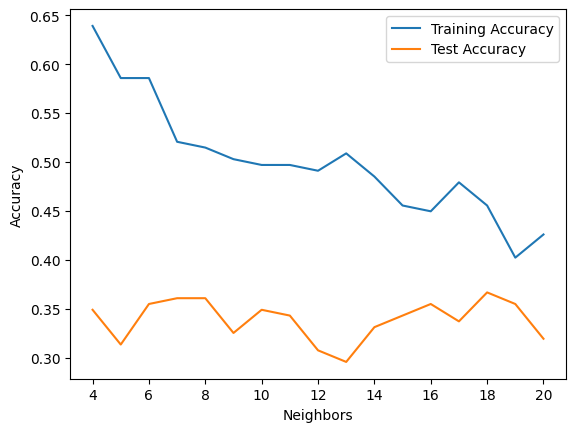

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

k_grid = np.array([(k + 1) for k in range(3, 20)])  
test_accuracies = []
train_accuracies = []
for k in k_grid:
     # For each k, create a fitted model instance, make predictions, and compute test and training accuracy
    model = KNeighborsClassifier(n_neighbors = k) 
    model = model.fit(X_train,y_train) 
    y_hat = model.predict(X_test) 
    test_accuracy = model.score(X_test,y_test) 
    training_acc = model.score(X_train,y_train) 
    print( f'Test accuracy for {k} neighbors is {test_accuracy}; train accuracy for {k} neighbors is {training_acc}')
    test_accuracies.append(test_accuracy) 
    train_accuracies.append(training_acc)
sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

In [97]:
is_optimal = test_accuracies == np.max(test_accuracies) 
optimal_indices = np.where( is_optimal ) 
k_optimal = k_grid[ optimal_indices ]
print("Best test accuracy: ",k_optimal)

Best test accuracy:  [18]


**Answer to part 3:** I trained a KNN classifier on the training set and tested several values of k. For each K, I computed test accuracy and training accuracy. I chose the k that gave me the highest test accuracy because that should generalize best to the new data. In my results, the best test accuracy occurred around k = 18. 


In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Create a model instance using the optimal k, fit the model, and make predictions
k = 3
model = KNeighborsClassifier(n_neighbors = k) 
model = model.fit(X_train, y_train) 
y_hat = model.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_hat))
print(pd.crosstab(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

Accuracy: 0.38461538461538464
col_0       1   2   3  4  5
mine_type                  
1          19   0   6  4  6
2           1  30   0  1  3
3           8   4   8  4  9
4          13   5   9  2  4
5          11   2  11  3  6
[[19  0  6  4  6]
 [ 1 30  0  1  3]
 [ 8  4  8  4  9]
 [13  5  9  2  4]
 [11  2 11  3  6]]


**Answer to part 4:** 
Overall test accuracy is roughly 38–39%, so the model is correct a bit less than half the time. It seems to identify mine types 1 and 2 more reliably, which matches the pairplot showing those groups are somewhat easier to separate. In contrast, types 3, 4, and 5 are much more mixed together in the feature space, so the classifier confuses them more often. <br>


**Answer to part 5:** 
I would not treat this as a “final answer” model. I would use it more like an initial flagging tool and assume the output could be wrong, especially when the prediction is close or unknown. In real use, I’d recommend extra verification like human review and, when there’s doubt, default to the most cautious removal method. A wrong label could push someone toward the wrong procedure, which is far more dangerous than marking the mine as “unknown.”



**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [99]:
import pandas as pd
import numpy as np

cars = pd.read_csv("./data/USA_cars_datasets.csv")

# keeping only the target y variables
cars = cars[["price", "year", "mileage"]]

# checking for missing values
print("NA counts:\n", cars.isna().sum())

# head + dimensions
display(cars.head())
print("Shape (rows, cols):", cars.shape)

NA counts:
 price      0
year       0
mileage    0
dtype: int64


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


Shape (rows, cols): (2499, 3)


**Answer to question 1:** There are no missing values (NAs) so we can move on to part 2. 

In [100]:
cars_norm = cars.copy()

for col in ["year", "mileage"]:
    cars_norm[col] = (cars_norm[col] - cars_norm[col].min()) / (cars_norm[col].max() - cars_norm[col].min())

print(cars_norm.head())

#checking the summary stats of the normalized data
cars_norm[["year","mileage"]].describe() 

   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537


,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [101]:
from sklearn.model_selection import train_test_split

X = cars_norm[["year","mileage"]]
y = cars_norm["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#printing to make sure it works
print("Total rows:", len(cars_norm))
print("Train rows:", len(X_train))
print("Test rows:", len(X_test))

print("Train %:", len(X_train) / len(cars_norm))
print("Test %:", len(X_test) / len(cars_norm))

# Make sure there is no overlap 
overlap = X_train.index.intersection(X_test.index)
print("Overlap rows:", len(overlap))

Total rows: 2499
Train rows: 1999
Test rows: 500
Train %: 0.7999199679871949
Test %: 0.2000800320128051
Overlap rows: 0


k =   3 | Test MSE = 148104157.19


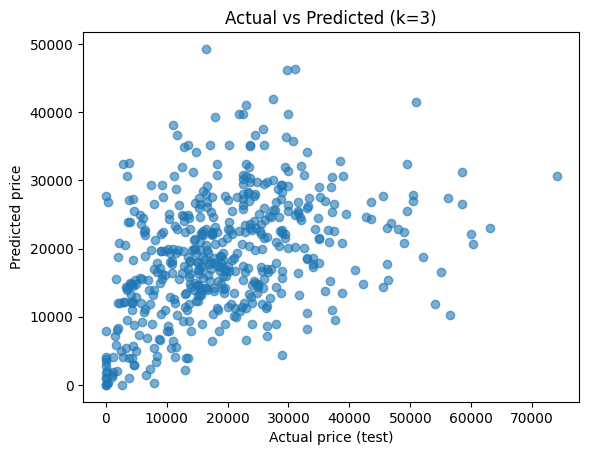

k =  10 | Test MSE = 117399126.11


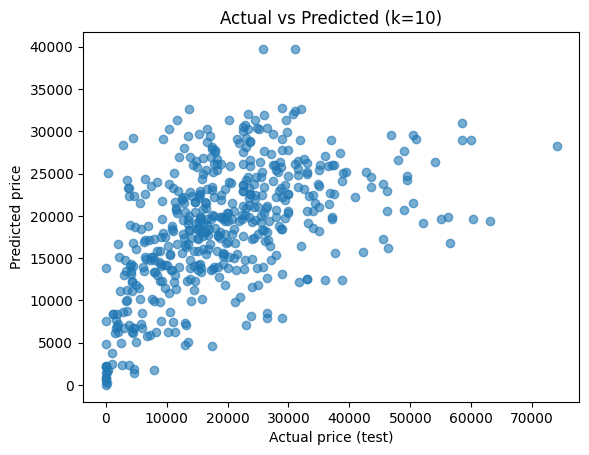

k =  25 | Test MSE = 112600455.16


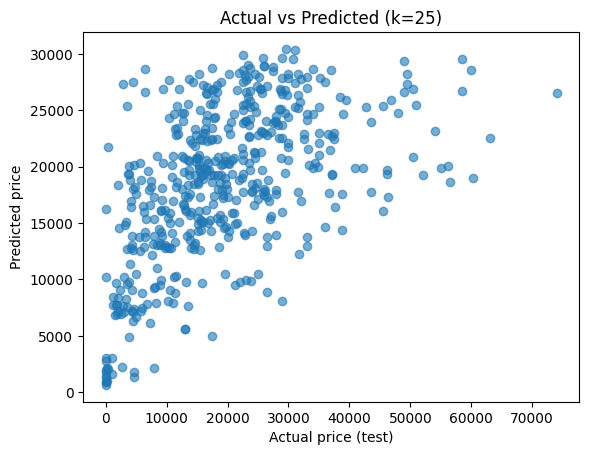

k =  50 | Test MSE = 110202549.30


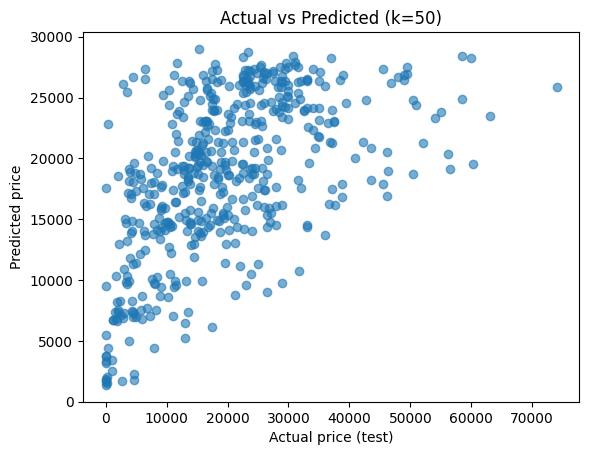

k = 100 | Test MSE = 112251075.34


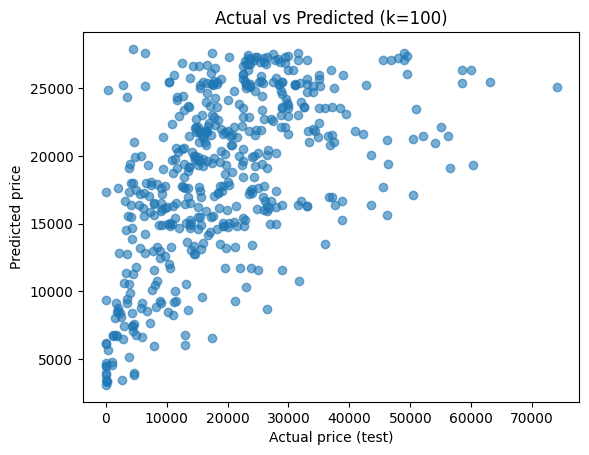

k = 300 | Test MSE = 114497987.76


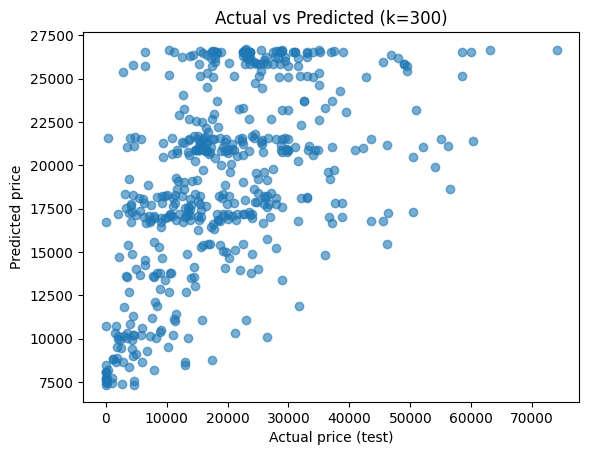

In [102]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

ks = [3, 10, 25, 50, 100, 300]
mse_results = {}

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # predict on test set
    y_pred = model.predict(X_test)

    # computing MSE
    mse = ((y_test - y_pred) ** 2).mean()
    mse_results[k] = mse

    print(f"k = {k:>3} | Test MSE = {mse:.2f}")

    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual price (test)")
    plt.ylabel("Predicted price")
    plt.title(f"Actual vs Predicted (k={k})")
    plt.show()

**Answer to part 4:** As k increases, the KNN predictions become smoother and less variable because each predicted price is an average over more data points. With small k values like 3, predictions are more sensitive to individual nearby points, so the scatterplot tends to look more scattered. As k grows, the predicted values typically cluster into a more stable band and extreme predictions become less common. With a very large k, predictions tend to shrink toward the overall average price, thus also skewing the data due to underfitting.

**Answer to part 5:** Out of the k values (3,10,25,50,100,300), the optimal k = 50 with the lowest MSE of 110202549.30 dollars squared. 

**Answer to part 6:** As k was a smaller value (example = 3), the KNN model was very sensitive, so predictions were more variable skewed. This is closer to overfitting, because the model can be influenced heavily by individual points. As k increased, predictions became smoother and less spread out because each prediction averages more neighbors. When k became very large (example = 300), the predictions became skewed once again because high prices were under-predicted and low prices were over-predicted. This is an example of underfitting because the model becomes too simple to capture real variation in the data. The "optimal" k is the one that best balances overfitting and underfitting AKA smallest MSE. 

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_airbnb = pd.read_csv("data/airbnb_hw.csv", encoding="latin1")
df_airbnb = df_airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']].copy()

df_airbnb["Price"] = (
    df_airbnb["Price"].astype(str)
      .str.replace(r"[\$,]", "", regex=True)
      .replace("nan", np.nan)
      .astype(float)
)

df_airbnb["Beds"] = pd.to_numeric(df_airbnb["Beds"], errors="coerce")

missing = df_airbnb['Review Scores Rating'].isnull()
df_missing = df_airbnb.loc[missing].copy()
df_complete = df_airbnb.loc[~missing].copy()

df_complete = df_complete.dropna(axis=0, how="any")
print(df_complete.head())

   Review Scores Rating  Price  Beds
4                  96.0  549.0   3.0
5                 100.0  149.0   1.0
6                 100.0  250.0   1.0
7                  94.0   90.0   1.0
8                  90.0  270.0   2.0


Test SSE for k=3: 456131.59; Train SSE for k=3: 1487689.11
Test SSE for k=5: 424812.87; Train SSE for k=5: 1423571.65
Test SSE for k=10: 396445.86; Train SSE for k=10: 1318660.59
Test SSE for k=15: 387185.96; Train SSE for k=15: 1282423.05
Test SSE for k=25: 381787.53; Train SSE for k=25: 1257891.09
Test SSE for k=50: 377070.75; Train SSE for k=50: 1234916.55
Test SSE for k=75: 376161.26; Train SSE for k=75: 1227863.39
Test SSE for k=80: 376084.72; Train SSE for k=80: 1226429.60
Test SSE for k=90: 376374.12; Train SSE for k=90: 1226762.32
Test SSE for k=100: 376406.67; Train SSE for k=100: 1225419.73


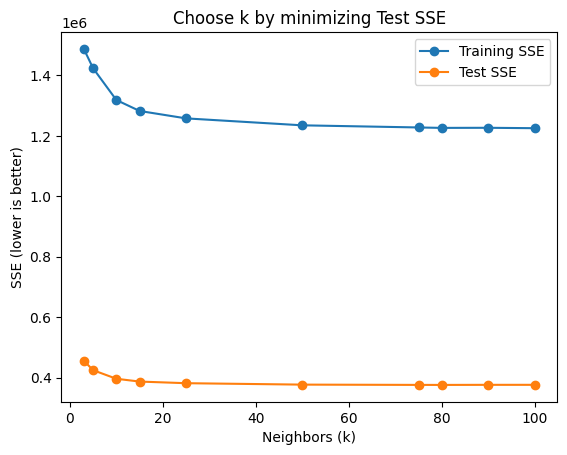

Optimal k = 80 | Min Test SSE = 376084.7244854388


In [91]:
X = df_complete[["Price", "Beds"]].to_numpy(dtype=float)
y = df_complete["Review Scores Rating"].to_numpy(dtype=float)

rng = np.random.default_rng(42)
n = X.shape[0]
idx = np.arange(n)
rng.shuffle(idx)

n_test = int(round(0.2 * n))
test_idx = idx[:n_test]
train_idx = idx[n_test:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

def knn_predict(X_train, y_train, X_query, k):
    eps = 1e-9
    preds = np.empty(X_query.shape[0], dtype=float)
    for i in range(X_query.shape[0]):
        dists = np.sqrt(np.sum((X_train - X_query[i])**2, axis=1))
        nn_idx = np.argpartition(dists, k-1)[:k]
        nn_d = dists[nn_idx]
        nn_y = y_train[nn_idx]
        w = 1.0 / (nn_d + eps)
        preds[i] = np.sum(w * nn_y) / np.sum(w)
    return preds

k_grid = [3, 5, 10, 15, 25, 50, 75, 80, 90, 100]
test_sse = []
train_sse = []

for k in k_grid:
    yhat_test = knn_predict(X_train, y_train, X_test, k)
    yhat_train = knn_predict(X_train, y_train, X_train, k)

    sse_test = np.sum((y_test - yhat_test)**2)
    sse_train = np.sum((y_train - yhat_train)**2)

    print(f"Test SSE for k={k}: {sse_test:.2f}; Train SSE for k={k}: {sse_train:.2f}")

    test_sse.append(sse_test)
    train_sse.append(sse_train)

test_sse = np.array(test_sse)
train_sse = np.array(train_sse)

plt.figure()
plt.plot(k_grid, train_sse, marker="o", label="Training SSE")
plt.plot(k_grid, test_sse, marker="o", label="Test SSE")
plt.xlabel("Neighbors (k)")
plt.ylabel("SSE (lower is better)")
plt.title("Choose k by minimizing Test SSE")
plt.legend()
plt.show()

optimal_idx = int(np.argmin(test_sse))
k_optimal = k_grid[optimal_idx]
print("Optimal k =", k_optimal, "| Min Test SSE =", test_sse[optimal_idx])

**Answer to part 4:** From the list of potential k's that I chose, the k that had the smallest SSE was the one I decided to use which was 80. 

In [92]:
X_train_full = df_complete[["Price", "Beds"]].to_numpy(dtype=float)
y_train_full = df_complete["Review Scores Rating"].to_numpy(dtype=float)

df_missing_ready = df_missing.dropna(subset=["Price", "Beds"]).copy()
X_missing = df_missing_ready[["Price", "Beds"]].to_numpy(dtype=float)

y_missing_hat = knn_predict(X_train_full, y_train_full, X_missing, k_optimal)
df_missing_ready["Predicted Review Scores Rating"] = y_missing_hat

print("Predicted", len(df_missing_ready), "missing ratings using k =", k_optimal)

#checking to make sure that the SSE printed is actually the smallest for the most optimal k
for k, sse in zip(k_grid, test_sse):
    print(k, sse)

Predicted 8282 missing ratings using k = 80
3 456131.59488732636
5 424812.8675283082
10 396445.86081443785
15 387185.96200371743
25 381787.53108139976
50 377070.75090651144
75 376161.2604237492
80 376084.7244854388
90 376374.11876405147
100 376406.6670768556


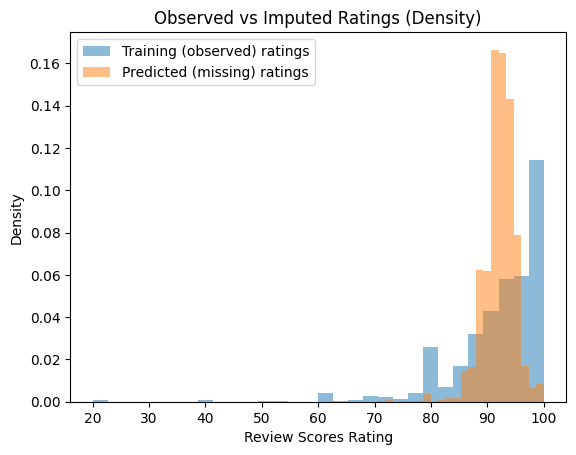

Training mean/std: 91.99163312378454 8.85176455817717
Predicted mean/std: 92.14337534761302 2.804688563547573


In [93]:
train_ratings = y_train_full
pred_ratings = df_missing_ready["Predicted Review Scores Rating"].to_numpy(dtype=float)

plt.figure()
plt.hist(train_ratings, bins=30, density=True, alpha=0.5, label="Training (observed) ratings")
plt.hist(pred_ratings, bins=30, density=True, alpha=0.5, label="Predicted (missing) ratings")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Observed vs Imputed Ratings (Density)")
plt.legend()
plt.show()

print("Training mean/std:", np.mean(train_ratings), np.std(train_ratings))
print("Predicted mean/std:", np.mean(pred_ratings), np.std(pred_ratings))

**Answer to part 6:** The predicted (missing) ratings are mostly in the same high-score range as the observed ratings, but they’re much more bunched together and it looks more like a standard distribution curve. The observed ratings are spread out more (skewed to the left) and include some really low scores, while the predicted ratings almost never get that low. This happens because kNN predicts by averaging nearby listings, so it smooths results toward typical values and avoids extreme ratings.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)